In [ ]:
# KODAI TSRUMI
# Master of Boinformatics
# Applied Multivariate Statistical Analysis
# Dec 2024

import numpy as np
# Plotting
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import altair as alt
from scipy import stats

# Hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_csv('Spotify_dataset.csv')

In [4]:
df_raw = pd.read_csv('Spotify_dataset.csv')

## Step1. Descriptive statistics

In [5]:
df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [6]:
df.shape

(114000, 21)

In [7]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [9]:
# Remove 'Unnamed' column 
df = df.iloc[:,1:]

## 2. Data Cleaning and Pre-processing

In [10]:
# Review duplicates and drop them?
df.duplicated().sum()

450

In [11]:
# Remove duplicate keeping one occurance for each duplicate
df = df.drop_duplicates()

In [12]:
# Check if any missing value
df.isnull().values.any()

True

In [13]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [14]:
# Identify the row with missing value
df[df.isnull().any(axis = 1)]

track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
65900            0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop

In [15]:
df = df.drop(65900)

**Categorical encoding**

In [16]:
# Convert 'explicit' column from boolean to integers (1 for True, 0 for False)
df['explicit'] = df['explicit'].astype(int)

In [17]:
# Convert 'track_genre' column from objects to integers
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Transform 'track_genre' to numerical values
df['track_genre_encoded'] = label_encoder.fit_transform(df['track_genre'])

In [31]:
df = df.drop('track_genre_encoded',axis=1)

In [20]:
# descriptive statistics
df.describe()

popularity   duration_ms       explicit   danceability  \
count  113549.000000  1.135490e+05  113549.000000  113549.000000   
mean       33.324433  2.280814e+05       0.085584       0.567031   
std        22.283855  1.064131e+05       0.279750       0.173409   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.741840e+05       0.000000       0.456000   
50%        35.000000  2.130000e+05       0.000000       0.580000   
75%        50.000000  2.615880e+05       0.000000       0.695000   
max       100.000000  5.237295e+06       1.000000       0.985000   

              energy            key       loudness           mode  \
count  113549.000000  113549.000000  113549.000000  113549.000000   
mean        0.642091       5.309452      -8.243408       0.637866   
std         0.251053       3.560147       5.011422       0.480620   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.473000       2.000000      -9.998000       0.000000   
50%         0.685000       5.000000      -6.997000       1.000000   
75%         0.854000       8.000000      -5.001000       1.000000   
max         1.000000      11.000000       4.532000       1.000000   

         speechiness   acousticness  instrumentalness       liveness  \
count  113549.000000  113549.000000     113549.000000  113549.000000   
mean        0.084674       0.314064          0.155703       0.213613   
std         0.105762       0.331906          0.309217       0.190462   
min         0.000000       0.000000          0.000000       0.000000   
25%         0.035900       0.016800          0.000000       0.098000   
50%         0.048900       0.168000          0.000041       0.132000   
75%         0.084500       0.596000          0.048700       0.273000   
max         0.965000       0.996000          1.000000       1.000000   

             valence          tempo  time_signature  track_genre_encoded  
count  113549.000000  113549.000000   113549.000000        113549.000000  
mean        0.474205     122.175745        3.904218            56.514007  
std         0.259204      29.972954        0.432117            32.914548  
min         0.000000       0.000000        0.000000             0.000000  
25%         0.260000      99.296000        4.000000            28.000000  
50%         0.464000     122.020000        4.000000            57.000000  
75%         0.683000     140.074000        4.000000            85.000000  
max         0.995000     243.372000        5.000000           113.000000

In [21]:
df_raw['track_genre'].nunique()

114

**Subset the dataframe into 10,000 samples**

In [22]:
# Subset data and subset into 50,000 datapoints
df = df.sample(n=10000, random_state=1)

In [23]:
print(df.shape)
print(df.isnull().values.any())

(10000, 21)
False


#### Standardize the data

In [ ]:
df_numeric = df.select_dtypes(include=[float, int])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# conver x_standardized array into dataframe 
x_standardized = StandardScaler().fit_transform(df_numeric)

In [ ]:
# Change Scaled arrays into df
df_scaled = pd.DataFrame(x_standardized, columns=df_numeric.columns)

In [ ]:
df_scaled

popularity  duration_ms  explicit  danceability    energy       key  \
0       1.508876     0.228898 -0.297082      0.143769 -0.662031  0.735822   
1      -1.498060    -0.658497 -0.297082      0.460567  0.944417  1.294617   
2       0.476644     2.962349 -0.297082     -1.682138  0.920500 -0.940565   
3      -1.498060     0.887554 -0.297082     -2.803603  0.812871  0.735822   
4      -0.779986    -0.684216 -0.297082     -0.668385  0.035558 -0.102371   
...          ...          ...       ...           ...       ...       ...   
9995    0.297126    -0.045984 -0.297082      0.817685  0.398304 -1.499360   
9996   -1.498060    -0.480911 -0.297082     -1.826137 -1.638656 -0.661167   
9997    0.925440    -0.461483 -0.297082      0.858004  0.513905  0.177026   
9998    1.239598    -0.823581 -0.297082     -1.538139 -2.319503 -1.499360   
9999    0.880561     0.022123 -0.297082      0.523927  0.434180  0.456424   

      loudness      mode  speechiness  acousticness  instrumentalness  \
0    -0.317969  0.764877    -0.461670      1.085926         -0.494984   
1     0.521556  0.764877     0.953102      1.687973         -0.494866   
2     0.697631  0.764877     0.678848     -0.828886          1.321379   
3     0.234202  0.764877    -0.293335     -0.849656         -0.484600   
4    -0.286779  0.764877    -0.177959      1.781291         -0.494980   
...        ...       ...          ...           ...               ...   
9995  0.488353  0.764877    -0.225245      0.321326         -0.494984   
9996 -1.193715  0.764877    -0.452213      1.477257         -0.494437   
9997  0.765042 -1.307399     0.149254     -0.739482         -0.494984   
9998 -4.362861  0.764877    -0.435191      1.925782          2.438887   
9999  0.421545 -1.307399    -0.462616     -0.349957         -0.494966   

      liveness   valence     tempo  time_signature  track_genre_encoded  
0    -0.734495  1.016935  2.763423        0.222470            -1.119210  
1     0.260743  1.818853  1.004786        0.222470             1.100015  
2     3.111131 -0.818221  0.709361        0.222470             0.887213  
3     0.404594 -1.115085 -1.388850       -2.104619             0.096804  
4    -0.676955  1.367774  0.108781       -2.104619             1.586421  
...        ...       ...       ...             ...                  ...  
9995  0.036974  1.367774 -0.983476        0.222470             0.552809  
9996 -0.064255 -1.076531 -1.086905        0.222470             0.248806  
9997 -0.037616  1.344642 -0.985401        0.222470             0.188005  
9998 -0.533104 -1.095808  0.260615        0.222470             0.704811  
9999 -0.389252  0.712361  0.231431        0.222470            -0.936808  

[10000 rows x 16 columns]

In [ ]:
df_scaled.describe()

popularity   duration_ms      explicit  danceability        energy  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean  -6.394885e-18  6.679102e-17  3.801404e-17 -2.280842e-16  1.207923e-16   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min   -1.498060e+00 -2.017591e+00 -2.970820e-01 -3.266128e+00 -2.547435e+00   
25%   -7.351059e-01 -5.445433e-01 -2.970820e-01 -6.338255e-01 -6.779761e-01   
50%    7.272744e-02 -1.494633e-01 -2.970820e-01  7.464967e-02  1.631171e-01   
75%    7.459219e-01  3.590952e-01 -2.970820e-01  7.370451e-01  8.527337e-01   
max    2.855264e+00  4.221051e+01  3.366074e+00  2.401674e+00  1.438709e+00   

                key      loudness          mode   speechiness  acousticness  \
count  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean   1.175948e-16 -1.037392e-16 -9.485746e-17 -3.126388e-17 -4.689582e-17   
std    1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min   -1.499360e+00 -6.964543e+00 -1.307399e+00 -7.964494e-01 -9.640454e-01   
25%   -9.405645e-01 -3.622393e-01 -1.307399e+00 -4.597790e-01 -9.101622e-01   
50%    1.770264e-01  2.455712e-01  7.648773e-01 -3.349462e-01 -4.222027e-01   
75%    1.015220e+00  6.626171e-01  7.648773e-01 -8.678531e-03  8.691890e-01   
max    1.574015e+00  1.999377e+00  7.648773e-01  8.301217e+00  2.034151e+00   

       instrumentalness      liveness       valence         tempo  \
count      1.000000e+04  1.000000e+04  1.000000e+04  1.000000e+04   
mean       4.760636e-17 -1.911360e-16 -1.108447e-16 -6.110668e-17   
std        1.000050e+00  1.000050e+00  1.000050e+00  1.000050e+00   
min       -4.949844e-01 -1.075210e+00 -1.839895e+00 -4.126992e+00   
25%       -4.949844e-01 -6.050292e-01 -8.374982e-01 -7.587484e-01   
50%       -4.948522e-01 -4.318748e-01 -2.787028e-02 -5.355705e-03   
75%       -3.590044e-01  3.193490e-01  8.164560e-01  6.046225e-01   
max        2.801500e+00  4.160713e+00  1.992344e+00  2.900935e+00   

       time_signature  track_genre_encoded  
count    1.000000e+04         1.000000e+04  
mean     2.618350e-16         9.237056e-18  
std      1.000050e+00         1.000050e+00  
min     -9.085883e+00        -1.696817e+00  
25%      2.224696e-01        -8.760072e-01  
50%      2.224696e-01         5.602784e-03  
75%      2.224696e-01         8.568125e-01  
max      2.549558e+00         1.738422e+00

### Data Exploration:

#### Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

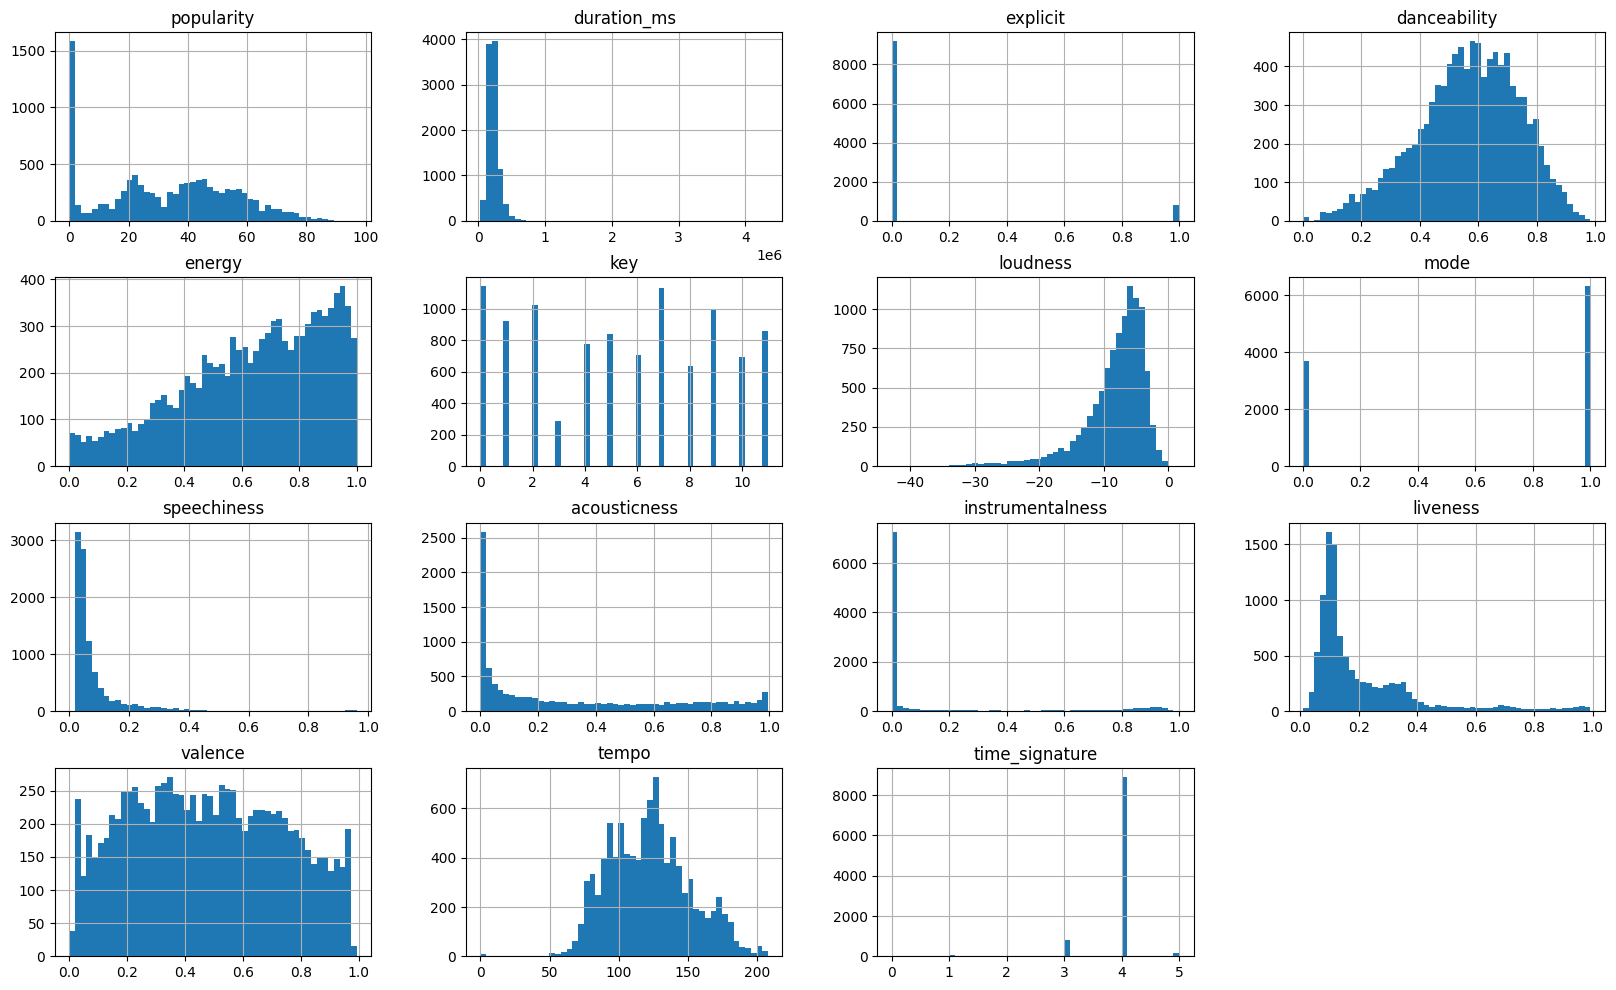

In [60]:
# Distribution visualisation
df.hist(bins=50, figsize=(20,12))
plt.show

#### Correlations

In [37]:
# Correlartion check
df_numeric = df.select_dtypes(include=[float, int])

In [38]:
df_numeric.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [39]:
# Calculate pearson corellation 
corr_df = df_numeric.corr(method='pearson')

<Axes: >

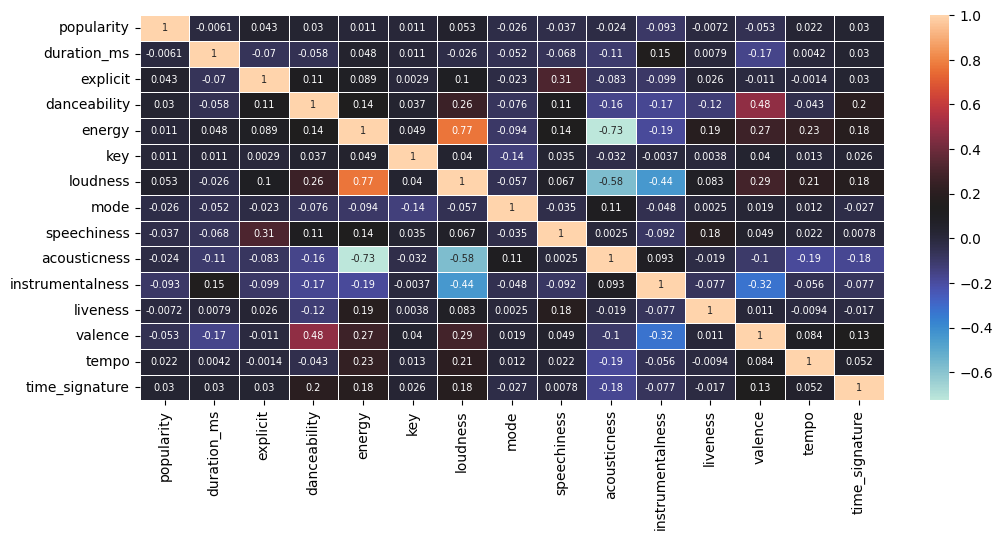

In [40]:
plt.figure(figsize=(12, 5)) 
sns.heatmap(corr_df,
            xticklabels=corr_df.columns,
            yticklabels=corr_df.columns,
            cmap='icefire',
            annot=True,
            annot_kws={"size": 7},
            linewidth=0.5)

## 3.Dimensionality reduction

#### 3.1 Demensionality reduction with PCA - Linear technique

In [41]:
from sklearn.decomposition import PCA

In [ ]:
# To project the data into a 2D space
pca = PCA(n_components=2, random_state=0)

In [43]:
# Reduce the data to two dimensions using the PCA model
pca_transformed = pca.fit_transform(x_standardized)

In [44]:
df_scaled['pca1'] = pca_transformed[:, 0]
df_scaled['pca2'] = pca_transformed[:, 1]

/var/folders/j3/zs_5blwd0c1dhngw4k7bdqw80000gn/T/ipykernel_62598/3589851417.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_scaled, x='pca1', y='pca2', palette='Set1', s=100, edgecolor='w', alpha=0.7)


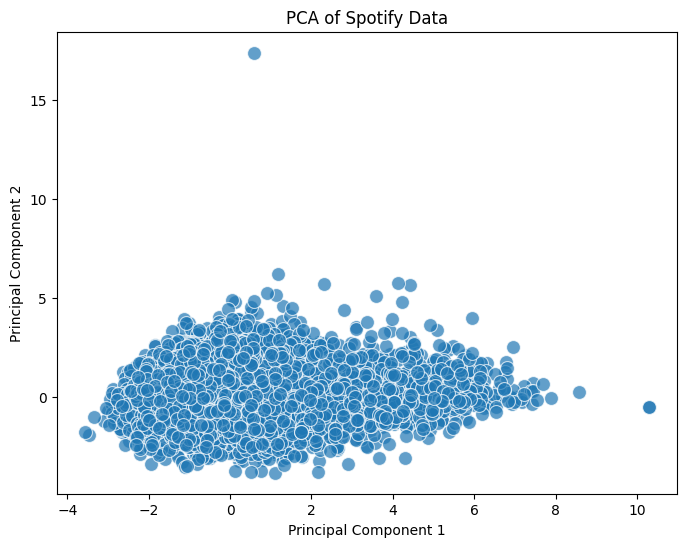

In [45]:
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, x='pca1', y='pca2', palette='Set1', s=100, edgecolor='w', alpha=0.7)

# Add labels and title
plt.title('PCA of Spotify Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

#### 3.2 Demensionality reduction with t-SNE - Non-Linear technique
 
t-SNE: Non linear technique that focuses on preserving the pairwise similarities between data points in a lower-dimensional space. t-SNE is concerned with preserving small pairwise distances whereas, PCA focuses on maintaining large pairwise distances to maximize variance.\
In summary, PCA preserves the variance in the data, whereas t-SNE preserves the relationships between data points (local structure) in a lower-dimensional space, making it quite a good algorithm for visualizing complex high-dimensional data. 
https://www.datacamp.com/tutorial/introduction-t-sne

In [46]:
from sklearn.manifold import TSNE

<Axes: >

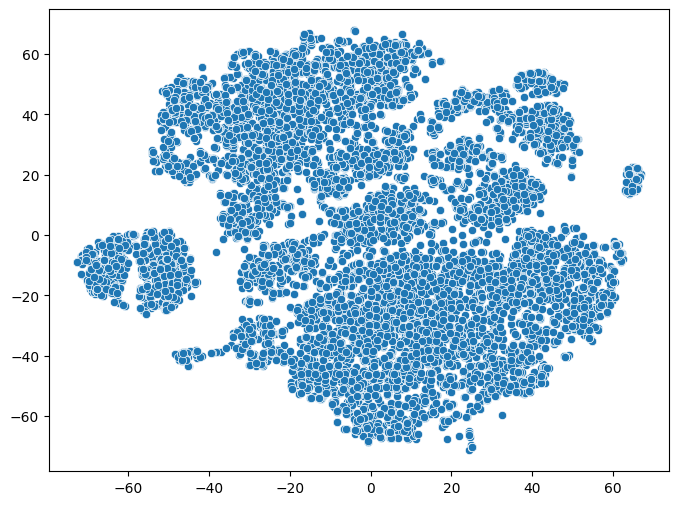

In [47]:
# x_standardized
X_tsne = TSNE(learning_rate=100, random_state=0).fit_transform(x_standardized)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1])

In [48]:
# Append the components into df
df_scaled['tsne1'] = X_tsne[:, 0]
df_scaled['tsne2'] = X_tsne[:, 1]

#### 3.3 Demensionality reduction with UMAP - Non-Linear technique

UMAP and t-SNE are both manifold-learning algorithms, having stochstic step.
Both calculate the similarities and then optimize a low-dimensional graph.
However UMAP give it a more solid footing and accelerate its calculations making it scale better with bigger datasets.

In [49]:
import umap.umap_ as umap
import umap.plot
import holoviews
import datashader
import bokeh


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,)). This has no effect and perhaps indicates a bug in the calling code (compiling a ufunc more than once for the same signature
  warnings.warn(msg, errors.NumbaW

In [ ]:
from umap.umap_ import UMAP

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/plot.py:450: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

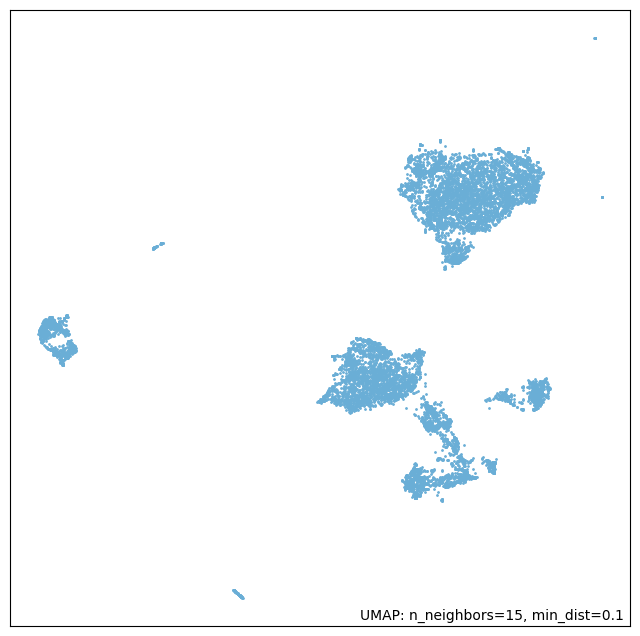

In [50]:
# Apply UMAP on the dataset, and plot umap projection
umap_reducer = umap.umap_.UMAP(n_components=2, random_state=0)
mapper = umap_reducer.fit(x_standardized)
umap.plot.points(mapper)

In [51]:
# Append the components into df
umap_embeddings = mapper.embedding_
# Add UMAP components to the original DataFrame
df_scaled['umap1'] = umap_embeddings[:, 0]
df_scaled['umap2'] = umap_embeddings[:, 1]

### 3.4 Choose optimal Demensional reduction method

In [61]:
from scipy.stats import spearmanr
from sklearn.metrics import pairwise_distances

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



Stress values:
--------------------------------------------------
PCA: 0.553
t-SNE: 12.856
UMAP: 1.093


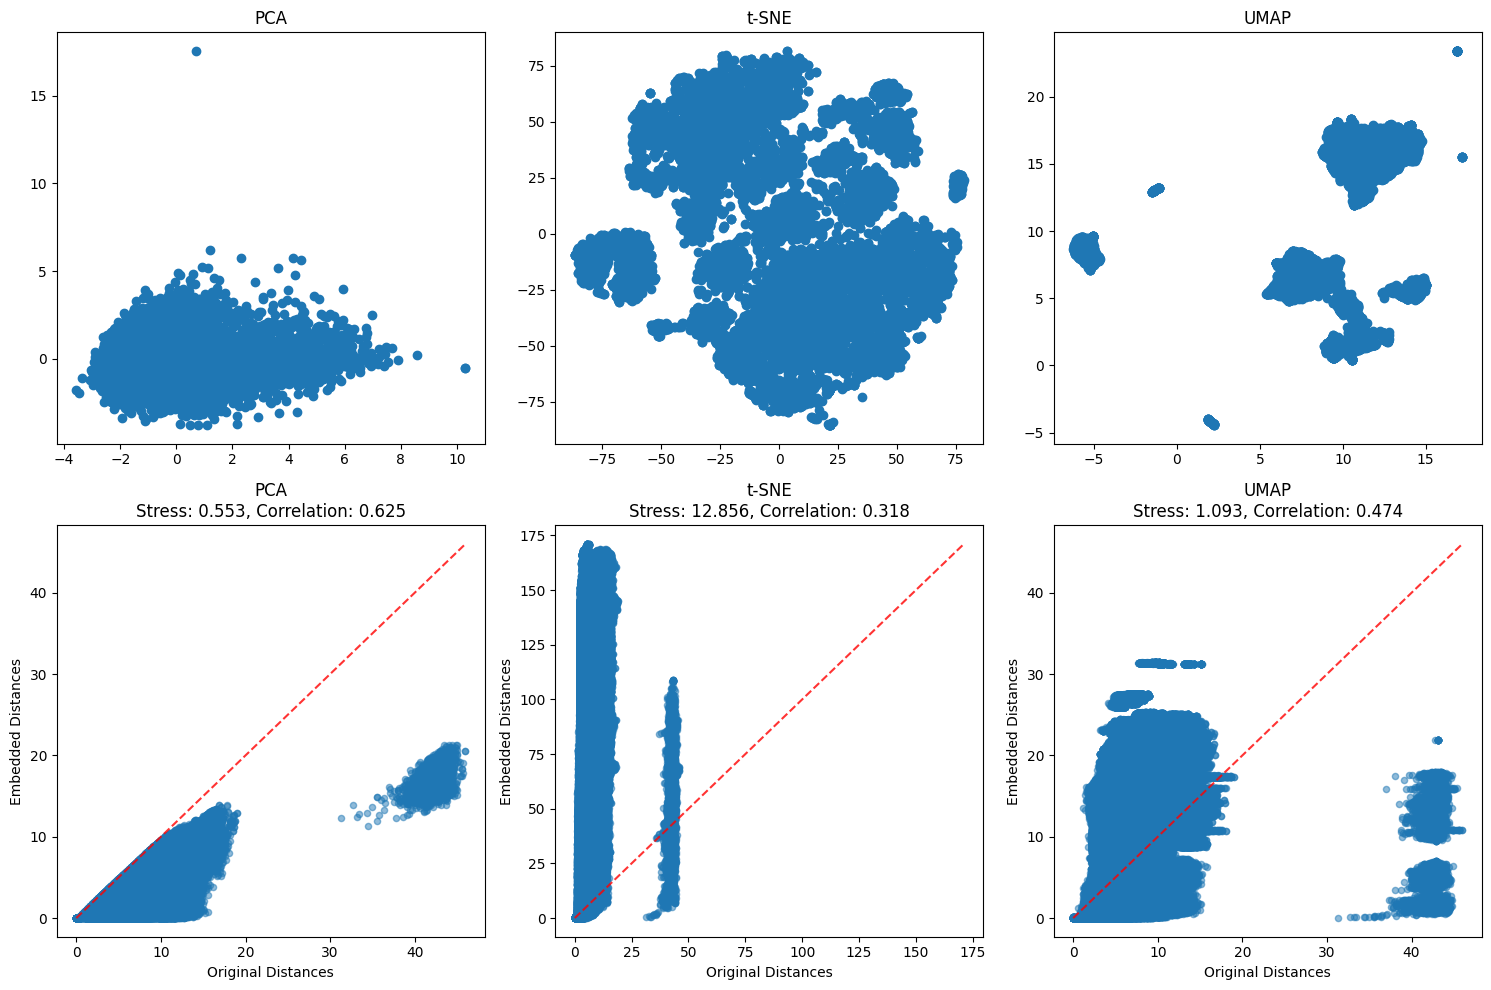

In [62]:
# Function to calculate stress
def calculate_stress(orig_dist, embedded_dist):
    return np.sqrt(np.sum((orig_dist - embedded_dist)**2)) / np.sqrt(np.sum(orig_dist**2))

# Function to create Shepard diagram
def plot_shepard_diagram(ax, original_distances, embedded_distances, method_name):
    # Flatten the distance matrices
    orig_dist_flat = original_distances[np.triu_indices(original_distances.shape[0], k=1)]
    emb_dist_flat = embedded_distances[np.triu_indices(embedded_distances.shape[0], k=1)]

    # Calculate stress
    stress = calculate_stress(orig_dist_flat, emb_dist_flat)

    # Calculate Spearman correlation
    correlation, _ = spearmanr(orig_dist_flat, emb_dist_flat)

    # Create scatter plot
    ax.scatter(orig_dist_flat, emb_dist_flat, alpha=0.5, s=20)

    # Add perfect correlation line
    min_dist = min(orig_dist_flat.min(), emb_dist_flat.min())
    max_dist = max(orig_dist_flat.max(), emb_dist_flat.max())
    ax.plot([min_dist, max_dist], [min_dist, max_dist], 'r--', alpha=0.8)

    ax.set_xlabel('Original Distances')
    ax.set_ylabel('Embedded Distances')
    ax.set_title(f'{method_name}\nStress: {stress:.3f}, Correlation: {correlation:.3f}')


# Calculate original distances
original_distances = pairwise_distances(x_standardized)

# Get embeddings
embeddings = {
    'PCA': PCA(n_components=2).fit_transform(x_standardized),
    't-SNE': TSNE(n_components=2, random_state=0).fit_transform(x_standardized),
    'UMAP': umap.umap_.UMAP(n_components=2, random_state=0).fit_transform(x_standardized)
}

# Calculate embedded distances for each method
embedded_distances = {
    method: pairwise_distances(embedding)
    for method, embedding in embeddings.items()
}

# Create figure with 2 rows and 4 columns
fig = plt.figure(figsize=(20, 10))

# Plot projections (top row) and Shepard diagrams (bottom row)
for idx, (method, embedding) in enumerate(embeddings.items()):
    # Projection plot (top row)
    ax_proj = plt.subplot(2, 4, idx + 1)
    ax_proj.scatter(embedding[:, 0], embedding[:, 1],)
    ax_proj.set_title(method)

    # Shepard diagram (bottom row)
    ax_shep = plt.subplot(2, 4, idx + 5)
    plot_shepard_diagram(ax_shep, original_distances, embedded_distances[method], method)

# Print stress values
print("\nStress values:")
print("-" * 50)
for method, distances in embedded_distances.items():
    stress = calculate_stress(original_distances, distances)
    print(f"{method}: {stress:.3f}")

plt.tight_layout()
plt.show()

Choose the method with the lowest stress and the highest correlation: **PCA** is the best option here.

## 4.Clustering

### 4.1 K-means clustering

In [63]:
from sklearn.cluster import KMeans

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

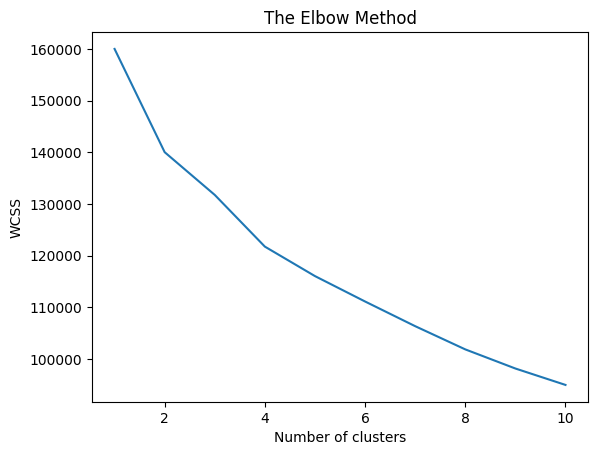

In [64]:
# Find the optimal number of clusters using elbow method

# Create an empty list
wcss = []
# Create 10 clusters using a for loop
for k in range(1, 11):
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k, random_state=0)
    # Fit model to samples
    kmeans.fit(x_standardized)
    # Append the inertia to the list of inertias
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Cluster with k = 4
kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(x_standardized)

# Also append to df_scaled
df_scaled['kmeans_cluster'] = list(map(str, kmeans.labels_ + 1)) # addint kmeans_cluster col
df_scaled.head()


popularity  duration_ms  explicit  danceability    energy       key  \
0    1.508876     0.228898 -0.297082      0.143769 -0.662031  0.735822   
1   -1.498060    -0.658497 -0.297082      0.460567  0.944417  1.294617   
2    0.476644     2.962349 -0.297082     -1.682138  0.920500 -0.940565   
3   -1.498060     0.887554 -0.297082     -2.803603  0.812871  0.735822   
4   -0.779986    -0.684216 -0.297082     -0.668385  0.035558 -0.102371   

   loudness      mode  speechiness  acousticness  ...     tempo  \
0 -0.317969  0.764877    -0.461670      1.085926  ...  2.763423   
1  0.521556  0.764877     0.953102      1.687973  ...  1.004786   
2  0.697631  0.764877     0.678848     -0.828886  ...  0.709361   
3  0.234202  0.764877    -0.293335     -0.849656  ... -1.388850   
4 -0.286779  0.764877    -0.177959      1.781291  ...  0.108781   

   time_signature  track_genre_encoded      pca1      pca2      tsne1  \
0        0.222470            -1.119210  0.022322 -0.512460  45.133556   
1        0.222470             1.100015 -1.050319 -1.869987  25.003054   
2        0.222470             0.887213 -0.369692  3.398630 -16.441341   
3       -2.104619             0.096804  0.816854  2.191853  21.004631   
4       -2.104619             1.586421  1.123905 -1.679225  30.749256   

       tsne2      umap1      umap2  kmeans_cluster  
0 -27.806738  13.072313  16.055645               3  
1 -70.261566  16.898678  23.392462               1  
2  -2.401181  10.913861  12.863860               2  
3   9.924125  14.896339   6.314312               2  
4  10.366646  14.291699   6.043712               3  

[5 rows x 23 columns]

#### Clusrtering on PCA
Applying Kmean clustering

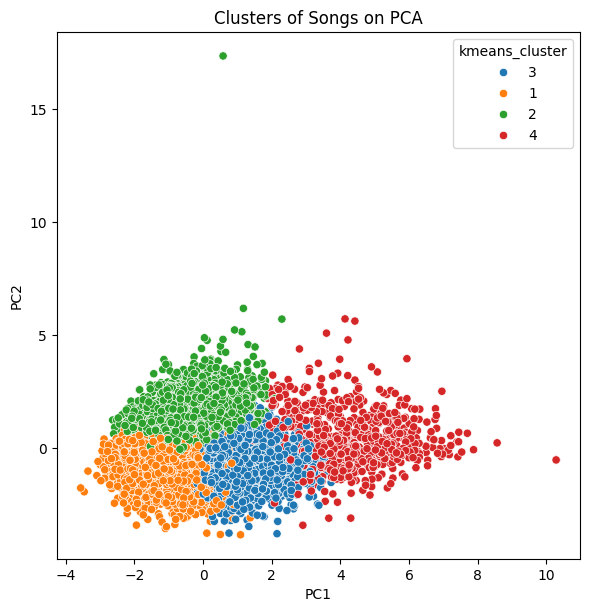

In [66]:
# Visualize the clusters on 2D PCA
fig, axes = plt.subplots(figsize=(6, 6))

# First plot with hue as "kmeans_cluster"
sns.scatterplot(data=df_scaled, x="pca1", y="pca2", hue="kmeans_cluster")

# Show the plots
plt.tight_layout()
plt.title('Clusters of Songs on PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

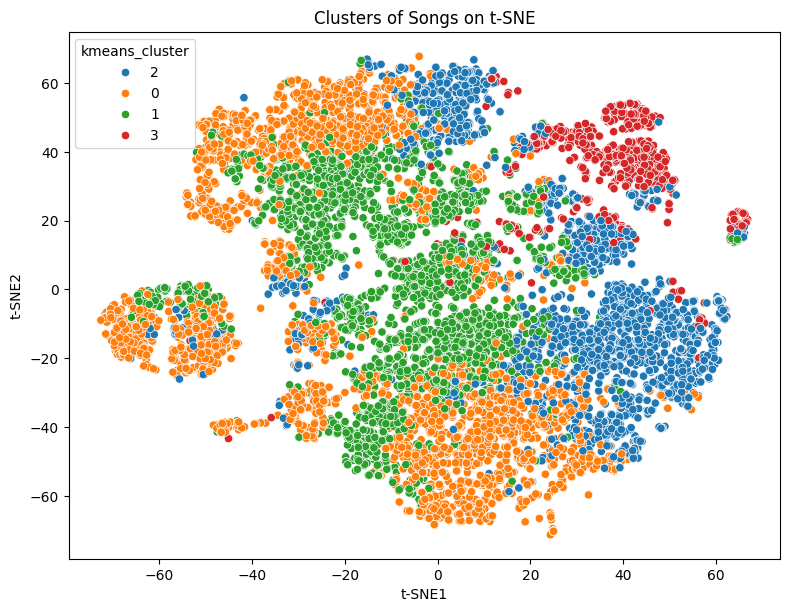

In [174]:
# Visualize the clusters on t-SNE
fig, axes = plt.subplots(figsize=(8, 6))

# First plot with hue as "kmeans_cluster"
sns.scatterplot(data=df, x="tsne1", y="tsne2", hue="kmeans_cluster")

# Show the plots
plt.tight_layout()
plt.title('Clusters of Songs on t-SNE')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

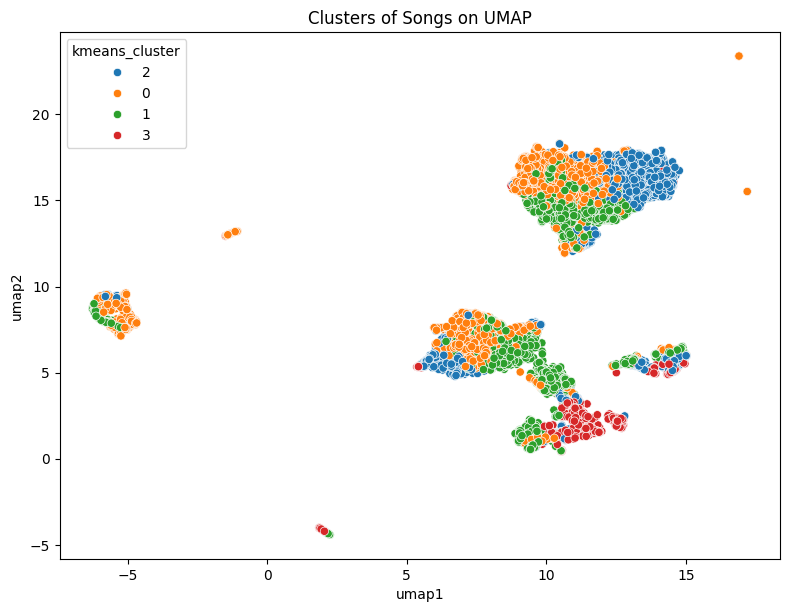

In [175]:
# Visualize the clusters on UMAP
fig, axes = plt.subplots(figsize=(8, 6))

# First plot with hue as "kmeans_cluster"
sns.scatterplot(data=df, x="umap1", y="umap2", hue="kmeans_cluster")

# Show the plots
plt.tight_layout()
plt.title('Clusters of Songs on UMAP')
plt.xlabel('umap1')
plt.ylabel('umap2')
plt.show()

#### Create a PCA object that reduces data into 3 components.

In [67]:
# PCA into 3 components
pca_3 = PCA(n_components=3, random_state=0)
pca_transformed_3 = pca_3.fit_transform(x_standardized)

In [68]:
# Append in dataframe
df_scaled['pca3.1'] = pca_transformed_3[:, 0]
df_scaled['pca3.2'] = pca_transformed_3[:, 1]
df_scaled['pca3.3'] = pca_transformed_3[:, 2]

In [69]:
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(
    df_scaled,
    x='pca3.1',  # x-axis
    y='pca3.2',  # y-axis
    z='pca3.3',  # z-axis
    color='kmeans_cluster',  # Color by k-means clusters
    title='3D PCA Scatter Plot by K-Means Clusters',
    labels={'pca3.1': 'PC1', 
            'pca3.2': 'PC2', 
            'pca3.3': 'PC3'},  # Axis labels
    color_continuous_scale='Viridis', 
)

fig.update_layout(
    scene=dict(
        aspectratio=dict(x=1, y=1, z=1),  # Equal aspect ratio
    ),
    width=800,  # Set the width of the figure
    height=800  # Set the height of the figure
)

fig.show()

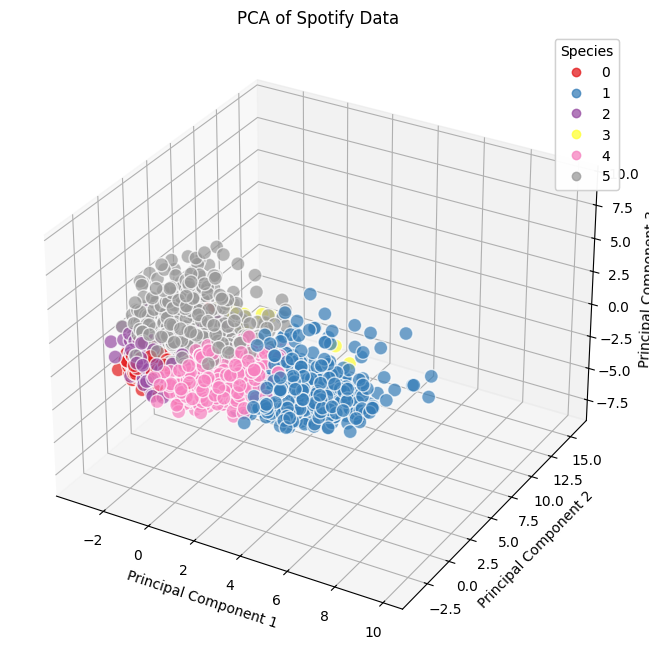

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Plot using Seaborn
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot using scatter method from Axes3D
scatter = ax.scatter(df['pca1'], df['pca2'], df['pca3'], 
                     c=df['kmeans_cluster'].astype('category').cat.codes, cmap='Set1', s=100, edgecolor='w', alpha=0.7)
                     

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Spotify Data')

# Show color legend for species
legend1 = ax.legend(*scatter.legend_elements(), title="Species")
ax.add_artist(legend1)

# Show the plot
plt.show()

#### Explore  the similarity of clusters and identify interesting patterns

kmeans_cluster
1    3703
2    3115
3    2409
4     773
Name: count, dtype: int64


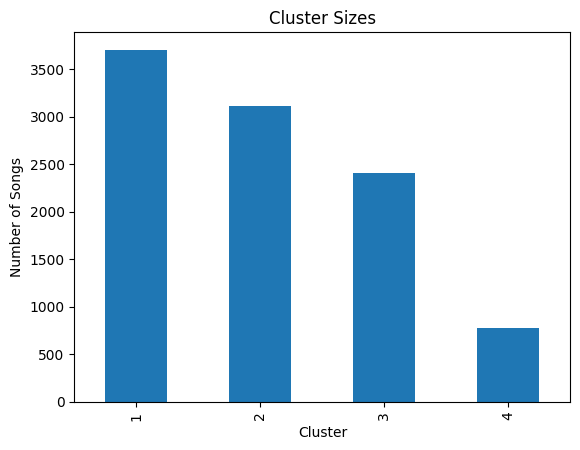

In [70]:
# Count the number of songs in each cluster
cluster_counts = df['kmeans_cluster'].value_counts().sort_index()
print(cluster_counts)

# Visualize cluster sizes
cluster_counts.plot(kind='bar', title='Cluster Sizes', xlabel='Cluster', ylabel='Number of Songs')
plt.show()


In [71]:
df_scaled.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre_encoded', 'pca1', 'pca2', 'tsne1', 'tsne2', 'umap1',
       'umap2', 'kmeans_cluster', 'pca3.1', 'pca3.2', 'pca3.3'],
      dtype='object')

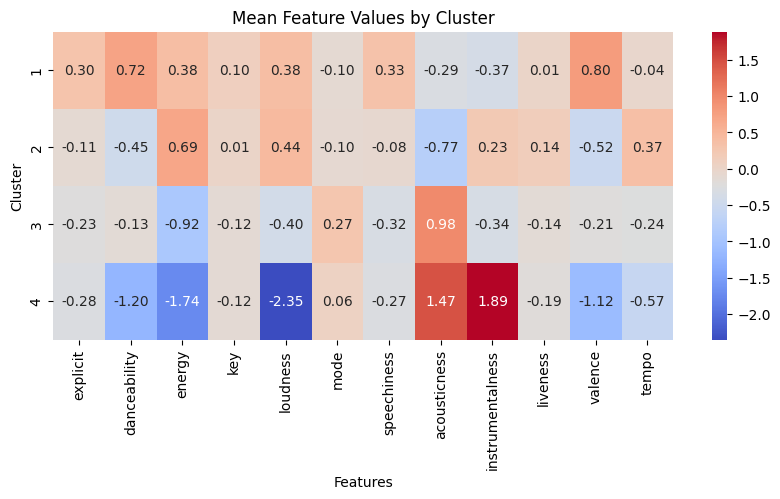

In [72]:
# Calculate the means of each values by different clusters.
features = ['explicit','danceability', 'energy',  'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# Calculate the mean of features for each cluster
cluster_means = df_scaled.groupby('kmeans_cluster')[features].mean()

# Visualize in heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mean Feature Values by Cluster")
plt.ylabel("Cluster")
plt.xlabel("Features")
plt.show()

Examine k = 2

In [97]:
# Cluster with k = 2
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(x_standardized)

# Also append to df_scaled
df_scaled['kmeans_cluster2'] = list(map(str, kmeans.labels_ + 1)) # addint kmeans_cluster col
df_scaled.head()

popularity  duration_ms  explicit  danceability    energy       key  \
0    1.508876     0.228898 -0.297082      0.143769 -0.662031  0.735822   
1   -1.498060    -0.658497 -0.297082      0.460567  0.944417  1.294617   
2    0.476644     2.962349 -0.297082     -1.682138  0.920500 -0.940565   
3   -1.498060     0.887554 -0.297082     -2.803603  0.812871  0.735822   
4   -0.779986    -0.684216 -0.297082     -0.668385  0.035558 -0.102371   

   loudness      mode  speechiness  acousticness  ...      pca2      tsne1  \
0 -0.317969  0.764877    -0.461670      1.085926  ... -0.512460  45.133556   
1  0.521556  0.764877     0.953102      1.687973  ... -1.869987  25.003054   
2  0.697631  0.764877     0.678848     -0.828886  ...  3.398630 -16.441341   
3  0.234202  0.764877    -0.293335     -0.849656  ...  2.191853  21.004631   
4 -0.286779  0.764877    -0.177959      1.781291  ... -1.679225  30.749256   

       tsne2      umap1      umap2  kmeans_cluster    pca3.1    pca3.2  \
0 -27.806738  13.072313  16.055645               3  0.024102 -0.508762   
1 -70.261566  16.898678  23.392462               1 -1.049509 -1.868829   
2  -2.401181  10.913861  12.863860               2 -0.366871  3.403874   
3   9.924125  14.896339   6.314312               2  0.818065  2.163829   
4  10.366646  14.291699   6.043712               3  1.129345 -1.688405   

     pca3.3  kmeans_cluster2  
0 -0.945210                2  
1 -0.086168                2  
2  1.378398                2  
3  0.789703                2  
4 -0.631200                1  

[5 rows x 27 columns]

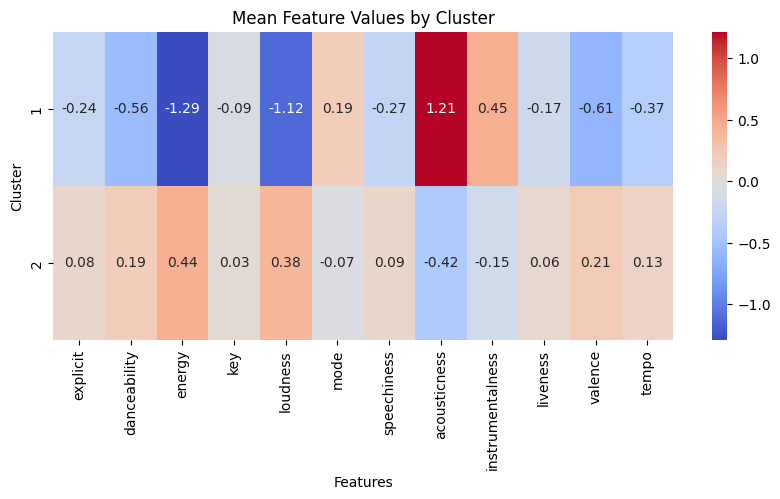

In [99]:
# Calculate the means of each values by different clusters.
features = ['explicit','danceability', 'energy',  'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
# Calculate the mean of features for each cluster
cluster_means = df_scaled.groupby('kmeans_cluster2')[features].mean()

# Visualize in heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mean Feature Values by Cluster")
plt.ylabel("Cluster")
plt.xlabel("Features")
plt.show()

It categorized the songs into two major groups.
Clear contrast of the taste of tracks and distinct feature differnce is obvious.

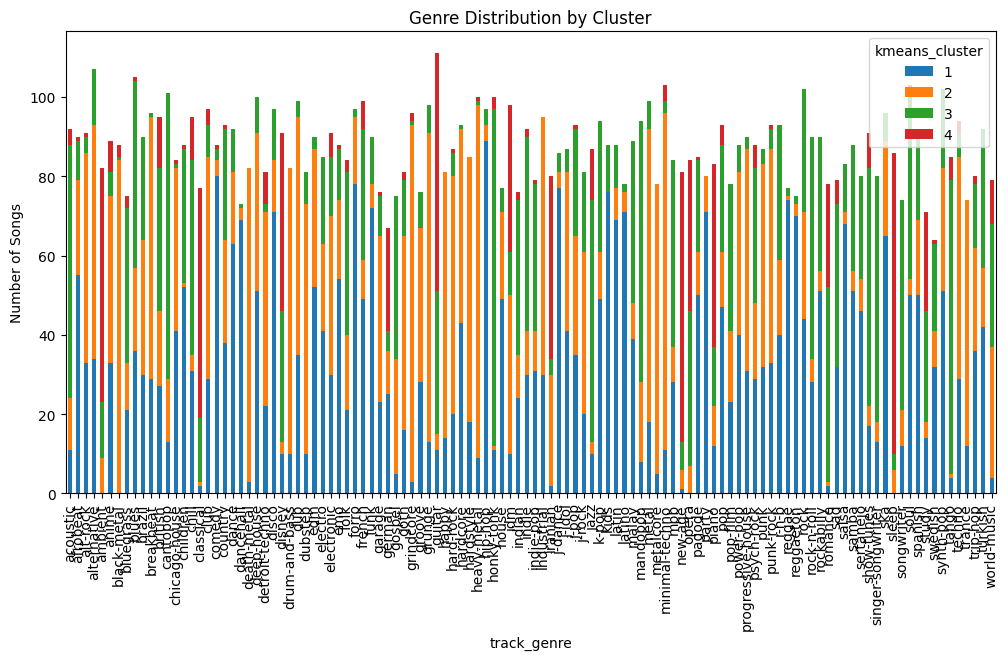

In [73]:
## Explore Categorical variables
# Genre distribution by cluster
genre_cluster = pd.crosstab(df['track_genre'], df['kmeans_cluster'])

# Visualize
genre_cluster.plot(kind='bar', stacked=True, figsize=(12, 6), title='Genre Distribution by Cluster')
plt.ylabel('Number of Songs')
plt.show()

In [75]:
# Normalize the crosstab by genre to calculate proportions
genre_cluster_proportions = genre_cluster.div(genre_cluster.sum(axis=1), axis=0)
# Display the normalized crosstab
print(genre_cluster_proportions)

# Find genres dominated by a specific cluster (e.g., threshold of 0.6)
threshold = 0.6
dominated_genres = genre_cluster_proportions[genre_cluster_proportions.max(axis=1) > threshold]
# Display the dominated genres with their corresponding dominant cluster
dominated_genres['Dominant_Cluster'] = dominated_genres.idxmax(axis=1)
print(dominated_genres)

kmeans_cluster         1         2         3         4
track_genre                                           
acoustic        0.119565  0.141304  0.695652  0.043478
afrobeat        0.611111  0.266667  0.111111  0.011111
alt-rock        0.362637  0.582418  0.043956  0.010989
alternative     0.317757  0.551402  0.130841  0.000000
ambient         0.000000  0.109756  0.170732  0.719512
...                  ...       ...       ...       ...
techno          0.308511  0.595745  0.063830  0.031915
trance          0.162162  0.837838  0.000000  0.000000
trip-hop        0.450000  0.325000  0.200000  0.025000
turkish         0.456522  0.163043  0.380435  0.000000
world-music     0.050633  0.417722  0.392405  0.139241

[114 rows x 4 columns]
kmeans_cluster            1         2         3         4 Dominant_Cluster
track_genre                                                               
acoustic           0.119565  0.141304  0.695652  0.043478                3
afrobeat           0.611111  0.26666

/var/folders/j3/zs_5blwd0c1dhngw4k7bdqw80000gn/T/ipykernel_62598/1445249021.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



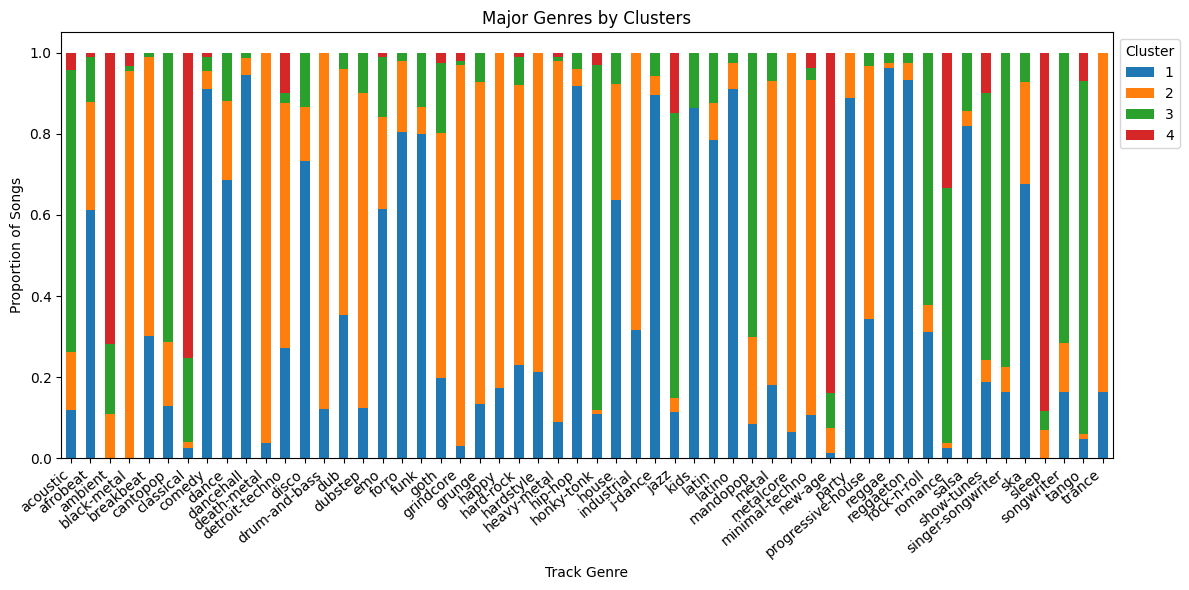

In [76]:
# Filter for dominated genres and their proportions
dominated_genres_plot = dominated_genres.drop(columns='Dominant_Cluster')

# Plot
dominated_genres_plot.plot(kind='bar', stacked=True, figsize=(12, 6), title='Major Genres by Clusters')
plt.ylabel('Proportion of Songs')
plt.xticks(rotation=40, ha='right')  # Rotates labels at 45 degrees
plt.xlabel('Track Genre')
plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()  
plt.show()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 19816 to 25043
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10000 non-null  object 
 1   artists           10000 non-null  object 
 2   album_name        10000 non-null  object 
 3   track_name        10000 non-null  object 
 4   popularity        10000 non-null  int64  
 5   duration_ms       10000 non-null  int64  
 6   explicit          10000 non-null  int64  
 7   danceability      10000 non-null  float64
 8   energy            10000 non-null  float64
 9   key               10000 non-null  int64  
 10  loudness          10000 non-null  float64
 11  mode              10000 non-null  int64  
 12  speechiness       10000 non-null  float64
 13  acousticness      10000 non-null  float64
 14  instrumentalness  10000 non-null  float64
 15  liveness          10000 non-null  float64
 16  valence           10000 non-null  float64

                 count       mean        std  min   25%   50%   75%   max
kmeans_cluster                                                           
1               3703.0  31.806913  23.446728  0.0   9.0  33.0  49.0  93.0
2               3115.0  35.339326  21.082326  0.0  19.0  37.0  52.0  97.0
3               2409.0  35.652968  21.867047  0.0  21.0  39.0  53.0  92.0
4                773.0  25.930142  20.285087  0.0   6.0  23.0  43.0  85.0


/var/folders/j3/zs_5blwd0c1dhngw4k7bdqw80000gn/T/ipykernel_62598/3042174395.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




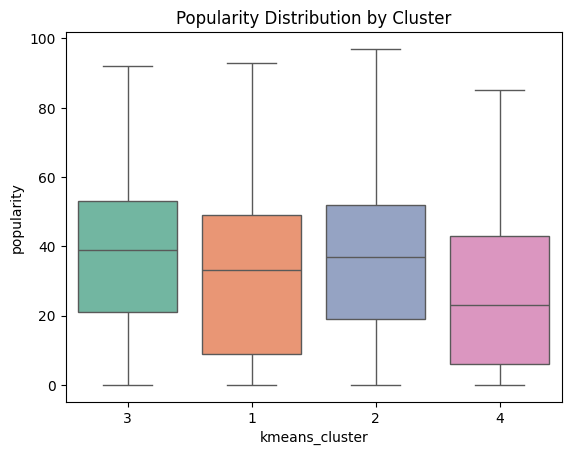

In [90]:
# Compare popularity across clusters
print(df.groupby('kmeans_cluster')['popularity'].describe())

# Visualize popularity by cluster
sns.boxplot(data=df, x='kmeans_cluster', y='popularity', palette='Set2')
plt.title('Popularity Distribution by Cluster')
plt.show()

 Check significance of the popularity difference

In [ ]:
from scipy import stats

# Kruskal-Wallis test (non-parametric alternative for not normal distributions)
h_stat, p_val = stats.kruskal(*(df[df['kmeans_cluster'] == cluster]['popularity'] for cluster in df['kmeans_cluster'].unique()))
print(f"Kruskal Wallis Test p-value: {p_val}")

Kruskal Wallis Test p-value: 1.4693050867206818e-32


**Post-hoc Pairwise Comparison**

In [ ]:

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD test
model = ols('popularity ~ C(kmeans_cluster)', data=df).fit()
tukey = pairwise_tukeyhsd(df['popularity'], df['kmeans_cluster'])
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   3.5324    0.0    2.151  4.9139   True
     1      3   3.8461    0.0   2.3587  5.3334   True
     1      4  -5.8768    0.0  -8.1237 -3.6298   True
     2      3   0.3136 0.9536   -1.228  1.8553  False
     2      4  -9.4092    0.0 -11.6924 -7.1259   True
     3      4  -9.7228    0.0 -12.0717  -7.374   True
-----------------------------------------------------


The cluster 1 and 4 are significantly different from other clusters!!

### 4.2 Hierachical clustering with PCA

In [217]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

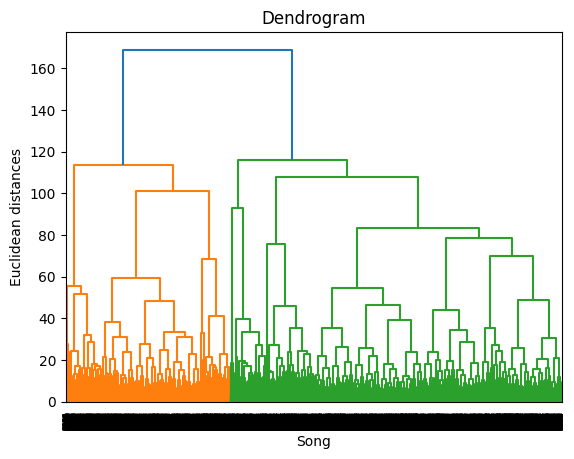

In [ ]:
# Create Dendrogram
dendrogram = sch.dendrogram(sch.linkage(x_standardized, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Song')
plt.ylabel('Euclidean distances')
plt.show()

In [215]:
from scipy.cluster.hierarchy import fcluster

depth_cut = 4 # depth_cut: number of clusters

y_hc = fcluster(sch.linkage(x_standardized, method = 'ward'), t=depth_cut, criterion='maxclust')

df_scaled['y_hc'] = y_hc
df_scaled

popularity  duration_ms  explicit  danceability    energy       key  \
0       1.508876     0.228898 -0.297082      0.143769 -0.662031  0.735822   
1      -1.498060    -0.658497 -0.297082      0.460567  0.944417  1.294617   
2       0.476644     2.962349 -0.297082     -1.682138  0.920500 -0.940565   
3      -1.498060     0.887554 -0.297082     -2.803603  0.812871  0.735822   
4      -0.779986    -0.684216 -0.297082     -0.668385  0.035558 -0.102371   
...          ...          ...       ...           ...       ...       ...   
9995    0.297126    -0.045984 -0.297082      0.817685  0.398304 -1.499360   
9996   -1.498060    -0.480911 -0.297082     -1.826137 -1.638656 -0.661167   
9997    0.925440    -0.461483 -0.297082      0.858004  0.513905  0.177026   
9998    1.239598    -0.823581 -0.297082     -1.538139 -2.319503 -1.499360   
9999    0.880561     0.022123 -0.297082      0.523927  0.434180  0.456424   

      loudness      mode  speechiness  acousticness  ...  time_signature  \
0    -0.317969  0.764877    -0.461670      1.085926  ...        0.222470   
1     0.521556  0.764877     0.953102      1.687973  ...        0.222470   
2     0.697631  0.764877     0.678848     -0.828886  ...        0.222470   
3     0.234202  0.764877    -0.293335     -0.849656  ...       -2.104619   
4    -0.286779  0.764877    -0.177959      1.781291  ...       -2.104619   
...        ...       ...          ...           ...  ...             ...   
9995  0.488353  0.764877    -0.225245      0.321326  ...        0.222470   
9996 -1.193715  0.764877    -0.452213      1.477257  ...        0.222470   
9997  0.765042 -1.307399     0.149254     -0.739482  ...        0.222470   
9998 -4.362861  0.764877    -0.435191      1.925782  ...        0.222470   
9999  0.421545 -1.307399    -0.462616     -0.349957  ...        0.222470   

      track_genre_encoded      pca1      pca2      tsne1      tsne2  \
0               -1.119210  0.022322 -0.512460  45.133556 -27.806738   
1                1.100015 -1.050319 -1.869987  25.003054 -70.261566   
2                0.887213 -0.369692  3.398630 -16.441341  -2.401181   
3                0.096804  0.816854  2.191853  21.004631   9.924125   
4                1.586421  1.123905 -1.679225  30.749256  10.366646   
...                   ...       ...       ...        ...        ...   
9995             0.552809 -0.726709 -1.431533  29.913158 -51.043045   
9996             0.248806  3.040549 -0.479837  56.718700 -11.330222   
9997             0.188005 -1.681627 -0.857593 -20.880259  50.131611   
9998             0.704811  5.635427 -0.217117  45.078392  40.967117   
9999            -0.936808 -1.191664  0.048748 -17.410173  44.804882   

          umap1      umap2  kmeans_cluster  y_hc  
0     13.072313  16.055645               3     2  
1     16.898678  23.392462               1     4  
2     10.913861  12.863860               2     4  
3     14.896339   6.314312               2     2  
4     14.291699   6.043712               3     2  
...         ...        ...             ...   ...  
9995  11.431183  16.875328               1     4  
9996  14.604800  16.929970               3     2  
9997   7.327074   6.507812               1     4  
9998  11.884158   1.531446               4     1  
9999   7.787733   5.984620               1     4  

[10000 rows x 24 columns]

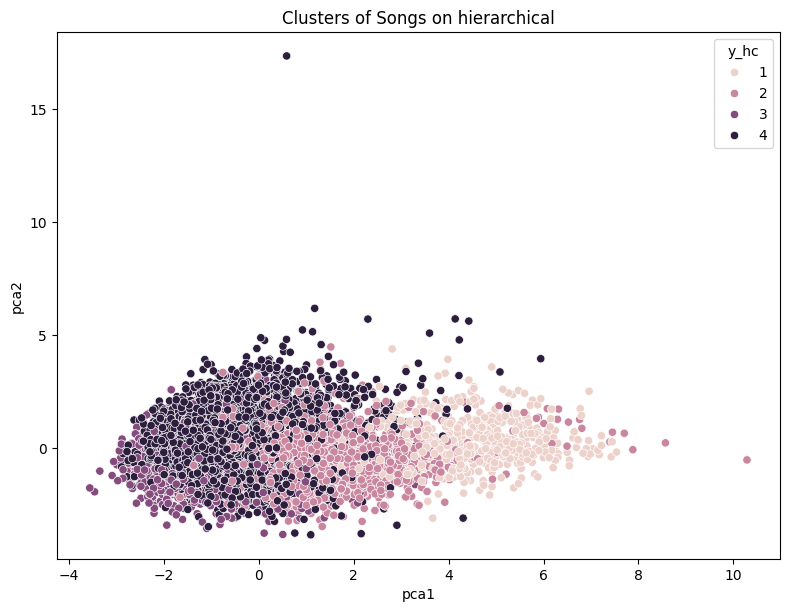

In [253]:
# Visualize the hierachical clusters
fig, axes = plt.subplots(figsize=(8, 6))

# First plot with hue as "kmeans_cluster"
sns.scatterplot(data=df_scaled, x="pca1", y="pca2", hue="y_hc")

# Show the plots
plt.tight_layout()
plt.title('Clusters of Songs on hierarchical')
plt.show()

In [262]:
import plotly.express as px

# Create a 3D scatter plot
fig = px.scatter_3d(
    df_scaled,
    x='pca3.1',  # x-axis
    y='pca3.2',  # y-axis
    z='pca3.3',  # z-axis
    color='y_hc',  # Color by k-means clusters
    title='3D PCA Scatter Plot by Hierarchical Clusters',
    labels={'pca3.1': 'PC1', 
            'pca3.2': 'PC2', 
            'pca3.3': 'PC3'},  # Axis labels
    color_continuous_scale='Viridis', 
)

fig.update_layout(
    scene=dict(
        aspectratio=dict(x=1, y=1, z=1),  # Equal aspect ratio
    )
)

fig.show()

### 4.3 HDBSCAN 

In [222]:
import hdbscan
# HDBSCAN() cluster method
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(x_standardized)

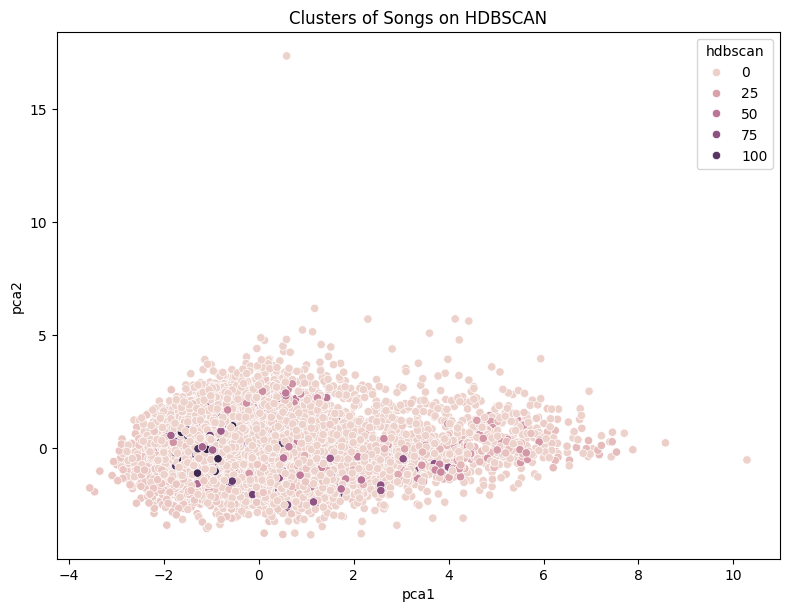

In [254]:
df_scaled["hdbscan"] = clusterer.labels_

# Visualize the clusters
fig, axes = plt.subplots(figsize=(8, 6))

# First plot with hue as "kmeans_cluster"
sns.scatterplot(data=df_scaled, x="pca1", y="pca2", hue="hdbscan")

# Show the plots
plt.tight_layout()
plt.title('Clusters of Songs on HDBSCAN')
plt.show()

In [260]:
# Create a 3D scatter plot
fig = px.scatter_3d(
    df_scaled,
    x='pca3.1',  # x-axis
    y='pca3.2',  # y-axis
    z='pca3.3',  # z-axis
    color='hdbscan',  # Color by k-means clusters
    title='3D PCA Scatter Plot by HDBSCAN Clusters',
    labels={'pca1': 'PC1', 
            'pca2': 'PC2', 
            'pca3': 'PC3'},  # Axis labels
    color_continuous_scale='Viridis', 
)

fig.update_layout(
    scene=dict(
        aspectratio=dict(x=1, y=1, z=1),  # Equal aspect ratio
    )
)

fig.show()